In [1]:
!pip install pulp

In [2]:
from pulp import *

In [3]:
#declare the model
model = LpProblem('Maximum', LpMaximize)

In [4]:
#make the list of nodes
zones = ['A', 'B', 'C', 'D', 'E', 'F']
zones2 = ['A', 'B', 'C', 'D', 'E', 'F']
P = 4
K = 11
#demand of each nodes
demand = [10,8,22,18,7,55]
zone_demand = dict(zip(zones, demand))
zone_demand

{'A': 10, 'B': 8, 'C': 22, 'D': 18, 'E': 7, 'F': 55}

In [5]:
# keys / index for decision variables / parameters
keys = [(l,l2) for l in zones for l2 in zones2]
length = [0,8,15,10,1000,1000,
          8,0,12,7,16,1000,
          15,12,0,1000,9,11,
          10,7,1000,0,11,17,
          1000,16,9,11,0,13,
          1000,1000,11,17,13,0]
keys
#define the distance between two nodes
distance = dict(zip(keys, length))
distance

{('A', 'A'): 0,
 ('A', 'B'): 8,
 ('A', 'C'): 15,
 ('A', 'D'): 10,
 ('A', 'E'): 1000,
 ('A', 'F'): 1000,
 ('B', 'A'): 8,
 ('B', 'B'): 0,
 ('B', 'C'): 12,
 ('B', 'D'): 7,
 ('B', 'E'): 16,
 ('B', 'F'): 1000,
 ('C', 'A'): 15,
 ('C', 'B'): 12,
 ('C', 'C'): 0,
 ('C', 'D'): 1000,
 ('C', 'E'): 9,
 ('C', 'F'): 11,
 ('D', 'A'): 10,
 ('D', 'B'): 7,
 ('D', 'C'): 1000,
 ('D', 'D'): 0,
 ('D', 'E'): 11,
 ('D', 'F'): 17,
 ('E', 'A'): 1000,
 ('E', 'B'): 16,
 ('E', 'C'): 9,
 ('E', 'D'): 11,
 ('E', 'E'): 0,
 ('E', 'F'): 13,
 ('F', 'A'): 1000,
 ('F', 'B'): 1000,
 ('F', 'C'): 11,
 ('F', 'D'): 17,
 ('F', 'E'): 13,
 ('F', 'F'): 0}

In [6]:
distance[('A','C')]

15

In [7]:
# declare the decision variables 
#(name, keys, bounds (0, inf), cat = integer, continuous, binary)
k = LpVariable.dicts('counted', keys, cat = 'Binary')
x = LpVariable.dicts('facility_location', zones, cat = 'Binary')
z = LpVariable.dicts('covered', zones, cat = 'Binary')

In [8]:
#new binary varible that shows if the nodes was consifered or not
k

{('A', 'A'): counted_('A',_'A'),
 ('A', 'B'): counted_('A',_'B'),
 ('A', 'C'): counted_('A',_'C'),
 ('A', 'D'): counted_('A',_'D'),
 ('A', 'E'): counted_('A',_'E'),
 ('A', 'F'): counted_('A',_'F'),
 ('B', 'A'): counted_('B',_'A'),
 ('B', 'B'): counted_('B',_'B'),
 ('B', 'C'): counted_('B',_'C'),
 ('B', 'D'): counted_('B',_'D'),
 ('B', 'E'): counted_('B',_'E'),
 ('B', 'F'): counted_('B',_'F'),
 ('C', 'A'): counted_('C',_'A'),
 ('C', 'B'): counted_('C',_'B'),
 ('C', 'C'): counted_('C',_'C'),
 ('C', 'D'): counted_('C',_'D'),
 ('C', 'E'): counted_('C',_'E'),
 ('C', 'F'): counted_('C',_'F'),
 ('D', 'A'): counted_('D',_'A'),
 ('D', 'B'): counted_('D',_'B'),
 ('D', 'C'): counted_('D',_'C'),
 ('D', 'D'): counted_('D',_'D'),
 ('D', 'E'): counted_('D',_'E'),
 ('D', 'F'): counted_('D',_'F'),
 ('E', 'A'): counted_('E',_'A'),
 ('E', 'B'): counted_('E',_'B'),
 ('E', 'C'): counted_('E',_'C'),
 ('E', 'D'): counted_('E',_'D'),
 ('E', 'E'): counted_('E',_'E'),
 ('E', 'F'): counted_('E',_'F'),
 ('F', 'A'

In [9]:
#binary varible that shows if the nodes was locateded or not
x

{'A': facility_location_A,
 'B': facility_location_B,
 'C': facility_location_C,
 'D': facility_location_D,
 'E': facility_location_E,
 'F': facility_location_F}

In [10]:
#binary varible that shows if the nodes was covered or not
z

{'A': covered_A,
 'B': covered_B,
 'C': covered_C,
 'D': covered_D,
 'E': covered_E,
 'F': covered_F}

In [11]:
#define the k
for l in zones:
    for l2 in zones2:
        if distance [(l,l2)] <=11:
            k[(l,l2)] = 1
        else:
            k[(l,l2)] = 0   

In [12]:
k[(l,l2)]

1

In [13]:
# objective function
model += lpSum(zone_demand[(l)]*z[(l)] for l in zones)

In [14]:
#try different orders for constraint
#for l in zones:
    #for l2 in zones2:
        #print(x[(l)],k[(l,l2)])
        #print()

In [15]:
#try different orders for constraint
#for l2 in zones2:
    #for l in zones:
        #print(x[(l)],k[(l,l2)])
        #print()

In [16]:
#constraint 1
for l2 in zones2:
    model += lpSum(x[(l)]*k[(l,l2)]for l in zones) >= z[(l)]

In [17]:
# constraint 2
model += lpSum(x[(l)] for l in zones) <= P

In [18]:
#solve the model
model.solve()

1

In [19]:
#maximum coverage/objective value
value(model.objective)

120.0

In [20]:
#get the solution for locations
for i in x:
    print('{} located {}'.format(i, x[i].varValue))

A located 1.0
B located 0.0
C located 1.0
D located 0.0
E located 0.0
F located 0.0


In [21]:
#get the details that every nodes were covered
for i in z:
    print('{} covered {}'.format(i, z[i].varValue))

A covered 1.0
B covered 1.0
C covered 1.0
D covered 1.0
E covered 1.0
F covered 1.0


In [22]:
#try may drawn the network
import networkx

In [23]:
left = tuple("FFDCABABDBCBEBEDECEF")
right = tuple("DCAABABDBCBEBEDECEF")
graph = networkx.Graph()

In [24]:
graph

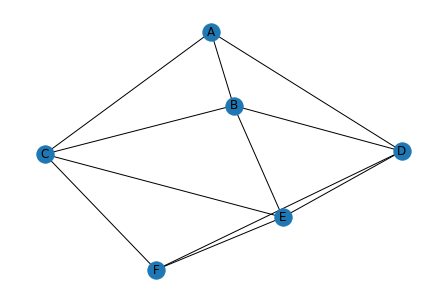

In [27]:
graph.add_edges_from(list(zip(left, right)))
networkx.draw(graph, with_labels=True)